In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
sys.path.append('../WILDS_notebooks')
sys.path.insert(0, '../')

from cmod_helper_fs import MODE_GROUP_MAP
from paths import FIG_DIR, RESULTS_DIR

categories = list(MODE_GROUP_MAP.keys())

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

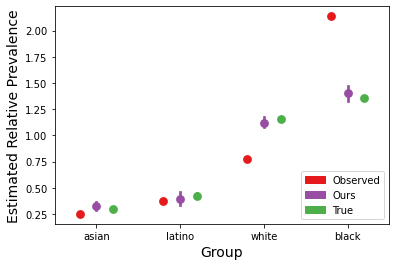

In [8]:

metric = 'pred_rel_prior'
val_loss_key = 'auc'
observed_results_df = pd.read_csv(RESULTS_DIR + "simulated_cmod_observed_identity_results")
our_results_df = pd.read_csv(RESULTS_DIR + "simulated_cmod_ours_identity_results")
true_results_df = pd.read_csv(RESULTS_DIR + "simulated_cmod_true_identity_results")
our_results_df = our_results_df.sort_values([val_loss_key], ascending=False).groupby(['group', 'seed']).head(1)

cmod_results_df = pd.concat([observed_results_df,  our_results_df, true_results_df])
cmod_results_df = cmod_results_df.sort_values(metric, ascending=True)
ax = sns.pointplot(x='group', y=metric, hue='method', hue_order=['observed', 'ours', True], palette=['#e41a1c', '#984ea3', '#4daf4a'],
            data=cmod_results_df, join=False, dodge=.4)

method_colors = ['#e41a1c', '#984ea3', '#4daf4a']
hue_order = ['observed', 'ours', True]
new_labels = ['Observed', 'Ours', 'True']

for j,box in enumerate(ax.artists):
    color = method_colors[j%3]
    box.set_edgecolor(color)
    box.set_facecolor('white')
    for k in range(6*j,6*(j+1)):
         ax.lines[k].set_color(color)

# ax.get_legend().set_title('')
# for t, l in zip(ax.get_legend().texts, new_labels): t.set_text(l)

patches = []
for method_name, method_color in zip(hue_order, method_colors):
    patches.append(mpatches.Patch(color=method_color, label=method_name))
labels = new_labels
ax.legend(handles = patches, labels = labels,loc = 'lower right')
plt.ylabel("Estimated Relative Prevalence")
plt.xlabel("Group")
plt.savefig(FIG_DIR + '/' + "supplementary_simulated_cmod_results.pdf", dpi=300)
# ax.set_xticks([0, 1, 2, 3], ['Asian',  'Latino', 'White', 'Black'])

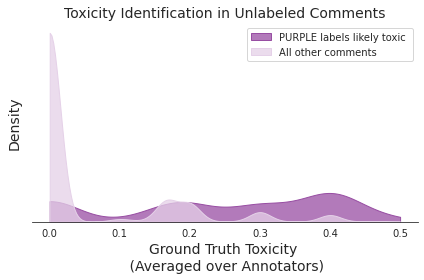

In [5]:
dfs = []
sns.set_style('white')

colors = ['#984ea3', '#e5d1e8']
plt.figure(figsize=(6, 4))
categories = ['identity']
for category in categories:
    dfs.append(pd.read_csv('../results/' +  category + 'unlabeled_toxicity_predictions'))
df = pd.concat(dfs)

sns.kdeplot(x='toxicity', shade=True, data=df[df['set'].str.contains('High')], color=colors[0], alpha=.75, 
            label='PURPLE labels likely toxic ', clip=(0, .5))
sns.kdeplot(x='toxicity', shade=True, data=df[df['set'].str.contains('Low')], color=colors[1], alpha=.75, 
            label='All other comments', clip=(0, .5))
ax = plt.gca()
ax.set_xticks([0,.1, .2, .3, .4 , .5])
plt.legend()
# plt.xlim(-.15, .6)
ax.set_yticklabels([])
# ax = sns.histplot(hue = 'set', x = 'toxicity', data=df, kde=True, 
#               palette = colors, alpha=.75, common_norm=False, stat='percent', fill=False)


plt.xlabel("Ground Truth Toxicity \n (Averaged over Annotators)")
plt.ylabel("Density")
plt.title("Toxicity Identification in Unlabeled Comments")
plt.tight_layout()
# ax.legend().set_title('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig(FIG_DIR + '/supplementary_unlabeled_comments.pdf', dpi=300)
# ax.legend(['"High Risk" Comments', '"Low Risk" Comments'])